In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
nbp = pd.read_csv("nbp.csv")
peg = pd.read_csv("peg.csv")
the = pd.read_csv("the.csv")
ttf = pd.read_csv("ttf.csv")
ztp = pd.read_csv("ztp.csv")
gbpeur = pd.read_csv("gbpeur.csv")
hubs = [nbp, peg, the, ttf, ztp, gbpeur]

In [3]:
for hub in hubs:
    hub["Date"] = pd.to_datetime(hub["Date"])
    hub.set_index("Date", inplace=True)

for idx, hub in enumerate(hubs):
    hubs[idx] = hub[hub.index >= '2018-10-01'].copy()

nbp, peg, the, ttf, ztp, gbpeur = hubs[0], hubs[1], hubs[2], hubs[3], hubs[4], hubs[5]

In [4]:
nbp_eur_mwh = nbp.copy()
nbp_eur_mwh[['CLOSE']] = nbp_eur_mwh[['CLOSE']]  * gbpeur[['CLOSE']]  / 2.9307

In [5]:

# Drop duplicate indices
nbp_eur_mwh = nbp_eur_mwh[~nbp_eur_mwh.index.duplicated(keep='first')]
peg = peg[~peg.index.duplicated(keep='first')]
the = the[~the.index.duplicated(keep='first')]
ttf = ttf[~ttf.index.duplicated(keep='first')]
ztp = ztp[~ztp.index.duplicated(keep='first')]

combined_hubs = pd.concat([nbp_eur_mwh[['CLOSE']], peg[['CLOSE']], the[['CLOSE']], ttf[['CLOSE']], ztp[['CLOSE']]], axis=1)
combined_hubs.columns = ['NBP', 'PEG', 'THE', 'TTF', 'ZTP']
combined_hubs = combined_hubs.interpolate(method='linear', axis=0)


In [6]:
last_2yrs = combined_hubs.loc['2022-09-01':]
log_combined_hubs = np.log(combined_hubs)
combined_hubs_pct_return = combined_hubs.pct_change(fill_method=None)


In [7]:
%load_ext rpy2.ipython

In [8]:
%%R -i log_combined_hubs
library(tseries)

nbp <- log_combined_hubs$NBP
peg <- log_combined_hubs$PEG
the <- log_combined_hubs$THE
ttf <- log_combined_hubs$TTF
ztp <- log_combined_hubs$ZTP

print(adf.test(nbp, k = 5))
print(adf.test(peg, k = 5))
print(adf.test(the, k = 5))
print(adf.test(ttf, k = 5))
print(adf.test(ztp, k = 5))


	Augmented Dickey-Fuller Test

data:  nbp
Dickey-Fuller = -1.7745, Lag order = 5, p-value = 0.6738
alternative hypothesis: stationary


	Augmented Dickey-Fuller Test

data:  peg
Dickey-Fuller = -1.6429, Lag order = 5, p-value = 0.7295
alternative hypothesis: stationary


	Augmented Dickey-Fuller Test

data:  the
Dickey-Fuller = -1.4997, Lag order = 5, p-value = 0.7901
alternative hypothesis: stationary


	Augmented Dickey-Fuller Test

data:  ttf
Dickey-Fuller = -1.4825, Lag order = 5, p-value = 0.7974
alternative hypothesis: stationary


	Augmented Dickey-Fuller Test

data:  ztp
Dickey-Fuller = -1.5864, Lag order = 5, p-value = 0.7534
alternative hypothesis: stationary



Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

    ‘tseries’ version: 0.10-57

    ‘tseries’ is a package for time series analysis and computational
    finance.

    See ‘library(help="tseries")’ for details.



In [9]:
%%R -i last_2yrs
library(tseries)

nbp <- last_2yrs$NBP
peg <- last_2yrs$PEG
the <- last_2yrs$THE
ttf <- last_2yrs$TTF
ztp <- last_2yrs$ZTP

print(adf.test(nbp, k = 5))
print(adf.test(peg, k = 5))
print(adf.test(the, k = 5))
print(adf.test(ttf, k = 5))
print(adf.test(ztp, k = 5))


	Augmented Dickey-Fuller Test

data:  nbp
Dickey-Fuller = -3.4015, Lag order = 5, p-value = 0.0532
alternative hypothesis: stationary




	Augmented Dickey-Fuller Test

data:  peg
Dickey-Fuller = -3.804, Lag order = 5, p-value = 0.0188
alternative hypothesis: stationary


	Augmented Dickey-Fuller Test

data:  the
Dickey-Fuller = -4.0354, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary


	Augmented Dickey-Fuller Test

data:  ttf
Dickey-Fuller = -4.2979, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary


	Augmented Dickey-Fuller Test

data:  ztp
Dickey-Fuller = -3.5086, Lag order = 5, p-value = 0.04148
alternative hypothesis: stationary



In addition: Warning messages:
1: In adf.test(the, k = 5) : p-value smaller than printed p-value
2: In adf.test(ttf, k = 5) : p-value smaller than printed p-value


In [10]:
%%R -i combined_hubs
library(tseries)

nbp <- combined_hubs$NBP
peg <- combined_hubs$PEG
the <- combined_hubs$THE
ttf <- combined_hubs$TTF
ztp <- combined_hubs$ZTP

print(adf.test(nbp, k = 5))
print(adf.test(peg, k = 5))
print(adf.test(the, k = 5))
print(adf.test(ttf, k = 5))
print(adf.test(ztp, k = 5))




	Augmented Dickey-Fuller Test

data:  nbp
Dickey-Fuller = -2.9825, Lag order = 5, p-value = 0.1624
alternative hypothesis: stationary


	Augmented Dickey-Fuller Test

data:  peg
Dickey-Fuller = -2.7412, Lag order = 5, p-value = 0.2646
alternative hypothesis: stationary


	Augmented Dickey-Fuller Test

data:  the
Dickey-Fuller = -2.1788, Lag order = 5, p-value = 0.5026
alternative hypothesis: stationary


	Augmented Dickey-Fuller Test

data:  ttf
Dickey-Fuller = -2.2341, Lag order = 5, p-value = 0.4792
alternative hypothesis: stationary


	Augmented Dickey-Fuller Test

data:  ztp
Dickey-Fuller = -2.5724, Lag order = 5, p-value = 0.336
alternative hypothesis: stationary



In [11]:
%%R
# Load necessary libraries
library(moments)   # For skewness, kurtosis, Jarque-Bera
library(tseries)   # For ADF test
library(forecast)  # For Ljung-Box Q test
library(urca)      # For KPSS test


nbp <- combined_hubs$NBP
peg <- combined_hubs$PEG
the <- combined_hubs$THE
ttf <- combined_hubs$TTF
ztp <- combined_hubs$ZTP


# Define a function to calculate the statistics with 5 lags
calculate_statistics <- function(data) {
  mean_val <- mean(data, na.rm = TRUE)
  sd_val <- sd(data, na.rm = TRUE)
  skewness_val <- skewness(data, na.rm = TRUE)
  kurtosis_val <- kurtosis(data, na.rm = TRUE)
  jarque_bera_val <- jarque.test(data)
  ljung_box_val <- Box.test(data, lag = 5, type = "Ljung-Box")
  kpss_val <- ur.kpss(data, lags = "short", use.lag = 5)
  adf_val <- adf.test(data, k = 5)
  
  return(list(mean = mean_val,
              std_dev = sd_val,
              skewness = skewness_val,
              kurtosis = kurtosis_val,
              jarque_bera = jarque_bera_val,
              ljung_box = ljung_box_val,
              kpss = summary(kpss_val),
              adf = adf_val))
}

# Calculate for each hub
nbp_stats <- calculate_statistics(nbp)
peg_stats <- calculate_statistics(peg)
the_stats <- calculate_statistics(the)
ttf_stats <- calculate_statistics(ttf)
ztp_stats <- calculate_statistics(ztp)

# Print results
print("NBP Statistics:")
print(nbp_stats)

print("PEG Statistics:")
print(peg_stats)

print("THE Statistics:")
print(the_stats)

print("TTF Statistics:")
print(ttf_stats)

print("ZTP Statistics:")
print(ztp_stats)


[1] "NBP Statistics:"
$mean
[1] 41.43028

$std_dev
[1] 38.5427

$skewness
[1] 1.848849

$kurtosis
[1] 6.712098

$jarque_bera

	Jarque-Bera Normality Test

data:  data
JB = 1743.2, p-value < 2.2e-16
alternative hypothesis: greater


$ljung_box

	Box-Ljung test

data:  data
X-squared = 7153.1, df = 5, p-value < 2.2e-16


$kpss

####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 5 lags. 

Value of test-statistic is: 7.1041 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


$adf

	Augmented Dickey-Fuller Test

data:  data
Dickey-Fuller = -2.9825, Lag order = 5, p-value = 0.1624
alternative hypothesis: stationary


[1] "PEG Statistics:"
$mean
[1] 42.42978

$std_dev
[1] 40.13314

$skewness
[1] 1.740303

$kurtosis
[1] 5.949417

$jarque_bera

	Jarque-Bera Normality Test

data:  data
JB = 1321.7, p-value < 2.2e-16
alternative hypothesis: greater


$ljung_box

	Box-Lj

In [14]:
%%R
library(urca)
selected_hubs <- combined_hubs[,c("NBP", "PEG")]
johansen_test_all_hubs <- ca.jo(selected_hubs, type="trace", ecdet="none", spec="longrun")

summary(johansen_test_all_hubs)


###################### 
# Johansen-Procedure # 
###################### 

Test type: trace statistic , with linear trend 

Eigenvalues (lambda):
[1] 0.037652260 0.005350695

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 1 |  8.17  6.50  8.18 11.65
r = 0  | 66.58 15.66 17.95 23.52

Eigenvectors, normalised to first column:
(These are the cointegration relations)

           NBP.l2    PEG.l2
NBP.l2  1.0000000  1.000000
PEG.l2 -0.9417167 -3.978402

Weights W:
(This is the loading matrix)

           NBP.l2      PEG.l2
NBP.d -0.05208045 0.003309971
PEG.d  0.02251845 0.003309960



In [12]:
%%R

hub_pairs <- combn(names(combined_hubs), 2, simplify = FALSE)

results <- data.frame()

for (pair in hub_pairs) {
  selected_hubs <- combined_hubs[, pair]
  
  jotest <- ca.jo(selected_hubs, type="trace", ecdet="none", spec="longrun")
  
  test_stats <- jotest@teststat
  crit_values_5pct <- jotest@cval[,2]
  
  coefficients_first_column <- jotest@V[,1]

  temp_df <- data.frame(
    Pair = paste(pair[1], "-", pair[2]),
    Rank = c("r <= 1", "r = 0"),
    Test_Statistic = test_stats,
    Significant_at_5_pct = test_stats > crit_values_5pct,
    `Coefficient 1` = coefficients_first_column
  )

  results <- rbind(results, temp_df)
}

print(results)


               Pair   Rank Test_Statistic Significant_at_5_pct Coefficient.1
r <= 1 |  NBP - PEG r <= 1       8.165623                FALSE     1.0000000
r = 0  |  NBP - PEG  r = 0      66.579096                 TRUE    -0.9417167
r <= 1 |1 NBP - THE r <= 1       4.935439                FALSE     1.0000000
r = 0  |1 NBP - THE  r = 0      32.555978                 TRUE    -0.6875931
r <= 1 |2 NBP - TTF r <= 1       5.193112                FALSE     1.0000000
r = 0  |2 NBP - TTF  r = 0      32.015093                 TRUE    -0.7157918
r <= 1 |3 NBP - ZTP r <= 1       6.959433                FALSE     1.0000000
r = 0  |3 NBP - ZTP  r = 0      40.933959                 TRUE    -0.8385289
r <= 1 |4 PEG - THE r <= 1       5.867441                FALSE     1.0000000
r = 0  |4 PEG - THE  r = 0      50.595214                 TRUE    -0.7752371
r <= 1 |5 PEG - TTF r <= 1       6.472239                FALSE     1.0000000
r = 0  |5 PEG - TTF  r = 0      57.354106                 TRUE    -0.8063651

In [15]:
%%R
# Loop through the results dataframe to generate plots for each pair
for (i in seq(1, nrow(results), by = 2)) {
  # Extract the hub pair and coefficient
  pair <- results$Pair[i]
  hubs <- unlist(strsplit(pair, " - "))
  
  # Extract the relevant coefficient
  coefficient <- results$Coefficient.1[i + 1]  # Coefficient for r = 0
  
  # Calculate the spread
  spread <- combined_hubs[[hubs[1]]] + coefficient * combined_hubs[[hubs[2]]]
  
  print(pair)
  print(adf.test(spread, k=5))
}


[1] "NBP - PEG"

	Augmented Dickey-Fuller Test

data:  spread
Dickey-Fuller = -5.5522, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary

[1] "NBP - THE"

	Augmented Dickey-Fuller Test

data:  spread
Dickey-Fuller = -5.0028, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary

[1] "NBP - TTF"

	Augmented Dickey-Fuller Test

data:  spread
Dickey-Fuller = -5.0895, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary

[1] "NBP - ZTP"

	Augmented Dickey-Fuller Test

data:  spread
Dickey-Fuller = -5.5854, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary

[1] "PEG - THE"

	Augmented Dickey-Fuller Test

data:  spread
Dickey-Fuller = -4.6385, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary

[1] "PEG - TTF"

	Augmented Dickey-Fuller Test

data:  spread
Dickey-Fuller = -4.6189, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary

[1] "PEG - ZTP"

	Augmented Dickey-Fuller Test

data:  spread
Dickey-Fuller = -4.7

In addition: Warning messages:
1: In adf.test(spread, k = 5) : p-value smaller than printed p-value
2: In adf.test(spread, k = 5) : p-value smaller than printed p-value
3: In adf.test(spread, k = 5) : p-value smaller than printed p-value
4: In adf.test(spread, k = 5) : p-value smaller than printed p-value
5: In adf.test(spread, k = 5) : p-value smaller than printed p-value
6: In adf.test(spread, k = 5) : p-value smaller than printed p-value
7: In adf.test(spread, k = 5) : p-value smaller than printed p-value
8: In adf.test(spread, k = 5) : p-value smaller than printed p-value
9: In adf.test(spread, k = 5) : p-value smaller than printed p-value
10: In adf.test(spread, k = 5) : p-value smaller than printed p-value


In [16]:
%%R

# Initialize a data frame to store the spreads
spreads <- data.frame(Time = rownames(combined_hubs))

# Loop through the results dataframe to calculate each spread
for (i in seq(1, nrow(results), by = 2)) {
  # Extract the hub pair and coefficient
  pair <- results$Pair[i]
  hubs <- unlist(strsplit(pair, " - "))
  
  # Extract the relevant coefficient for r = 0
  coefficient <- results$Coefficient.1[i + 1]  
  
  # Calculate the spread
  spread <- combined_hubs[[hubs[1]]] + coefficient * combined_hubs[[hubs[2]]]
  
  # Store the spread in the spreads data frame with a column named after the pair
  spreads[[paste(hubs[1], hubs[2], sep = "_")]] <- spread
}





In [18]:

%R -o spreads

spreads_df = pd.DataFrame(spreads)

spreads_df


,Time,NBP_PEG,NBP_THE,NBP_TTF,NBP_ZTP,PEG_THE,PEG_TTF,PEG_ZTP,THE_TTF,THE_ZTP,TTF_ZTP
1,2018-10-01 00:00:00,2.898929,9.898182,9.233651,6.085910,6.187907,5.456924,2.832899,-0.948146,-4.457871,-3.343634
2,2018-10-02 00:00:00,2.432226,9.540149,8.935871,5.613066,6.308082,5.644908,2.825363,-0.860643,-4.622848,-3.586269
3,2018-10-03 00:00:00,2.598732,9.537969,9.022984,5.706830,6.129811,5.567218,2.750756,-0.730873,-4.488508,-3.582018
4,2018-10-04 00:00:00,2.704557,9.578056,9.065381,5.728050,6.043098,5.483346,2.654221,-0.727276,-4.502756,-3.598807
5,2018-10-05 00:00:00,2.576850,10.335993,9.296845,5.924223,6.997848,5.844802,2.989830,-1.492664,-5.303367,-3.632212
...,...,...,...,...,...,...,...,...,...,...,...
1520,2024-08-26 00:00:00,1.439798,8.792304,9.723097,5.114725,5.979037,7.053518,3.138871,1.378825,-3.843849,-4.978617
1521,2024-08-27 00:00:00,1.685007,9.312636,10.011460,5.391179,6.237912,7.051542,3.153875,1.042151,-4.162716,-4.960511
1522,2024-08-28 00:00:00,1.568081,9.207952,9.984426,5.233952,6.253752,7.154818,3.110857,1.154969,-4.238691,-5.141971
1523,2024-08-29 00:00:00,1.113124,9.113116,9.560011,4.859970,6.653970,7.183503,3.196661,0.675701,-4.644307,-5.071165


In [19]:
spreads_df["Time"] = pd.to_datetime(spreads_df["Time"])
spreads_df.set_index("Time", inplace=True)

In [21]:
%%R -i spreads_df
data = spreads_df$THE_ZTP
calculate_statistics <- function(data) {
  mean_val <- mean(data, na.rm = TRUE)
  sd_val <- sd(data, na.rm = TRUE)
  skewness_val <- skewness(data, na.rm = TRUE)
  kurtosis_val <- kurtosis(data, na.rm = TRUE)
  jarque_bera_val <- jarque.test(data)
  ljung_box_val <- Box.test(data, lag = 5, type = "Ljung-Box")
  kpss_val <- ur.kpss(data, lags = "short", use.lag = 5)
  adf_val <- adf.test(data, k = 5)
  
  return(list(mean = mean_val,
              std_dev = sd_val,
              skewness = skewness_val,
              kurtosis = kurtosis_val,
              jarque_bera = jarque_bera_val,
              ljung_box = ljung_box_val,
              kpss = summary(kpss_val),
              adf = adf_val))
}

print(calculate_statistics(data))

$mean
[1] -3.579011

$std_dev
[1] 8.386882

$skewness
[1] 0.8678144

$kurtosis
[1] 15.44891

$jarque_bera

	Jarque-Bera Normality Test

data:  data
JB = 10032, p-value < 2.2e-16
alternative hypothesis: greater


$ljung_box

	Box-Ljung test

data:  data
X-squared = 5408.5, df = 5, p-value < 2.2e-16


$kpss

####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 5 lags. 

Value of test-statistic is: 1.2251 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


$adf

	Augmented Dickey-Fuller Test

data:  data
Dickey-Fuller = -5.6244, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary




In addition: Warning message:
In adf.test(data, k = 5) : p-value smaller than printed p-value


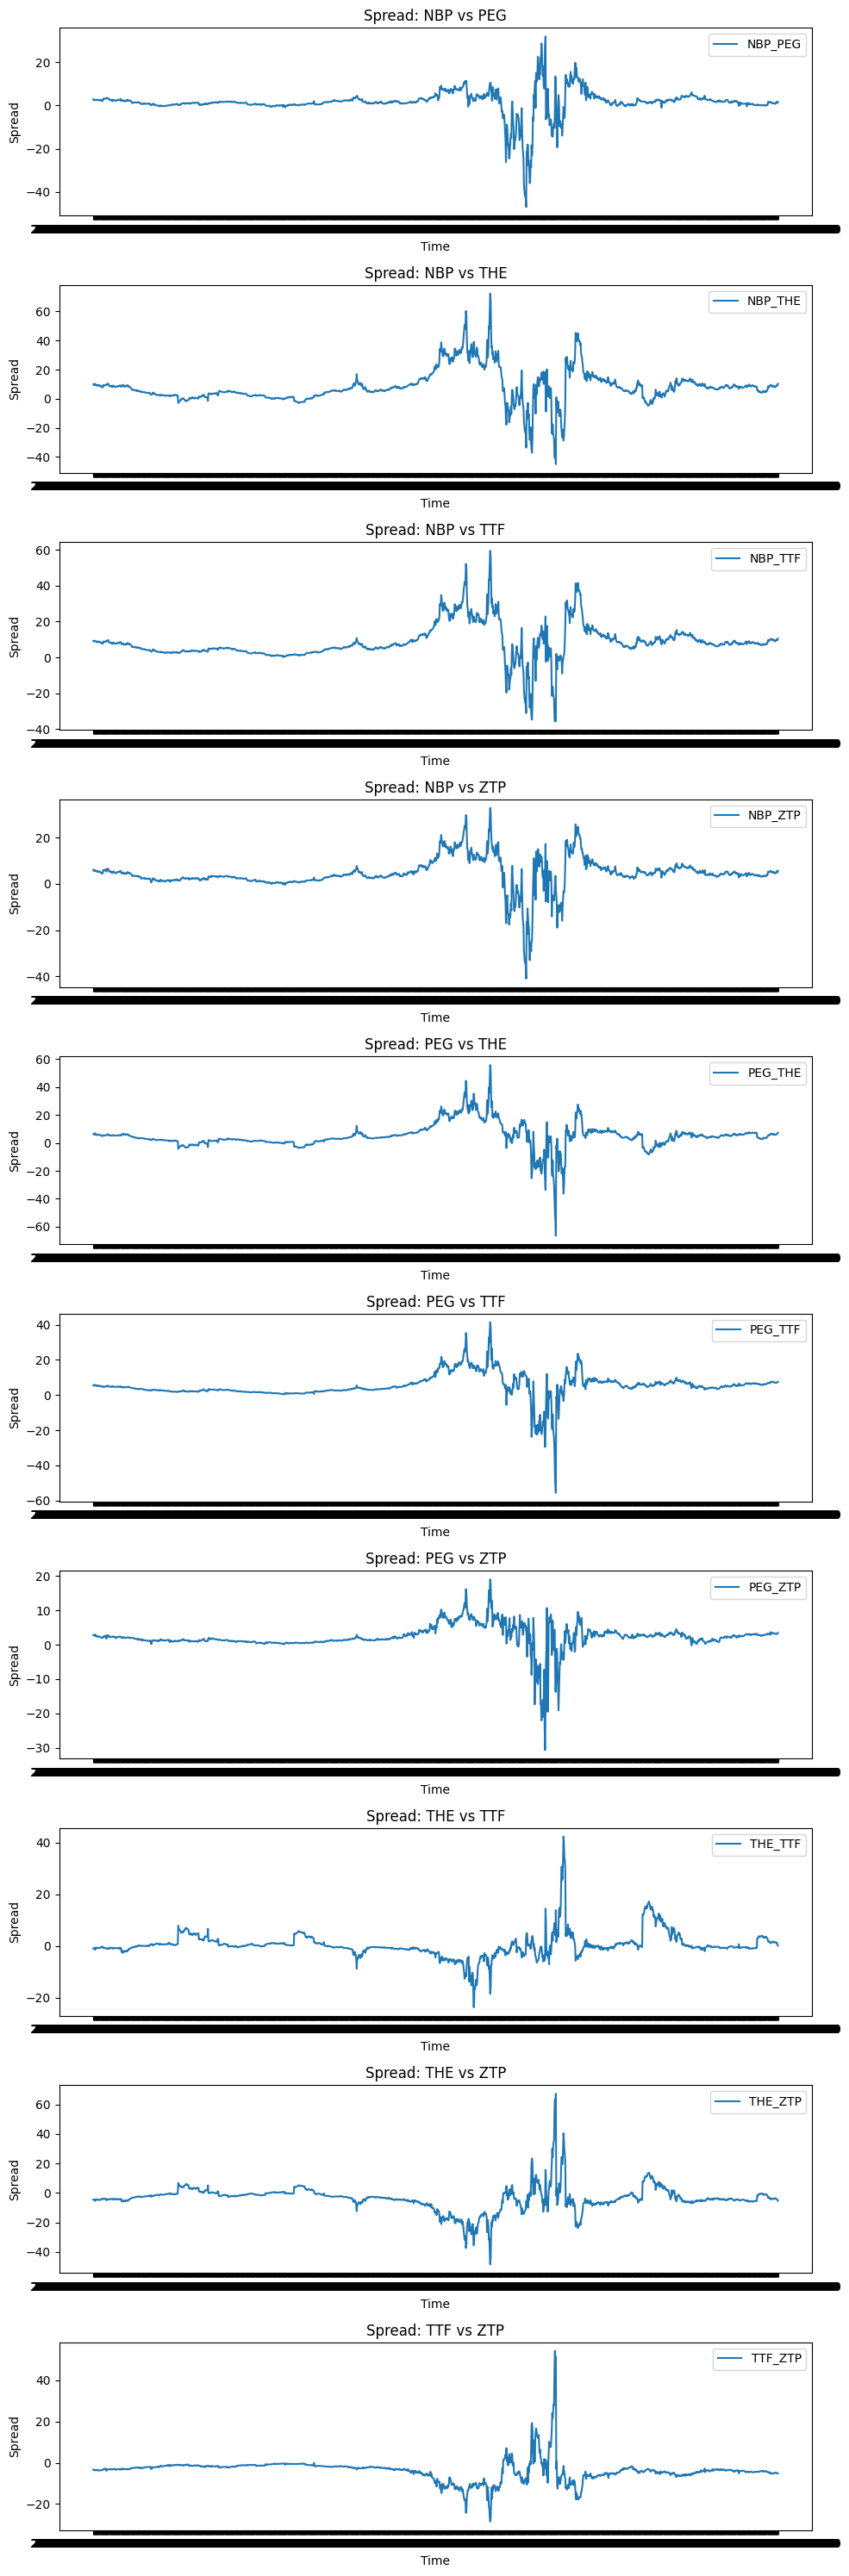

In [64]:

# Plot each spread in a separate subplot
num_spreads = len(spreads_df.columns) - 1  # Exclude the 'Time' column

fig, axes = plt.subplots(nrows=num_spreads, ncols=1, figsize=(10, num_spreads * 3))

for i, col in enumerate(spreads_df.columns[1:]):  # Skip the 'Time' column
    axes[i].plot(spreads_df['Time'], spreads_df[col], label=col)
    axes[i].set_title(f"Spread: {col.replace('_', ' vs ')}")
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel('Spread')
    axes[i].legend()

plt.tight_layout()
plt.show()


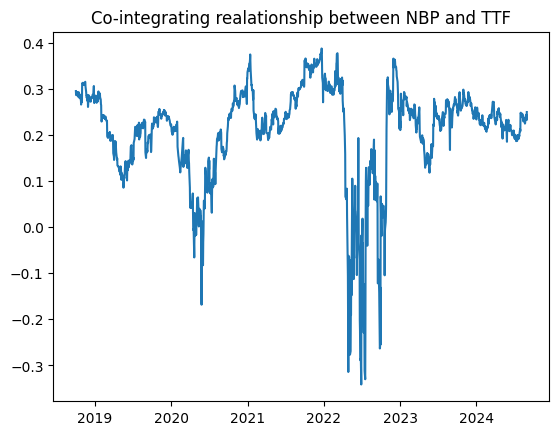

In [179]:
plt.plot(combined_hubs.index, combined_hubs["NBP"] - 0.9263*combined_hubs["TTF"])
plt.title("Co-integrating realationship between NBP and TTF")

plt.show()

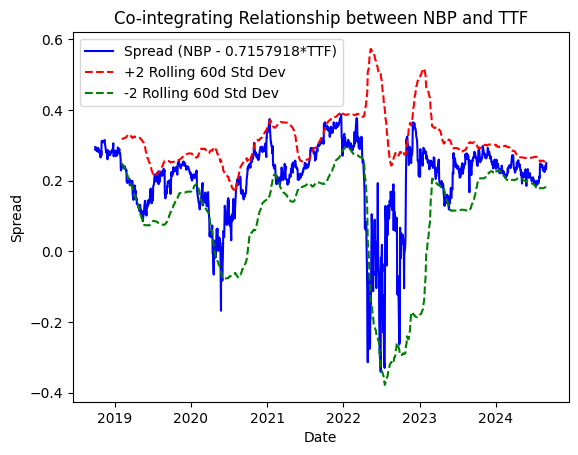

In [181]:
spread = combined_hubs["NBP"] - 0.9263*combined_hubs["TTF"]

# Calculate the 180-day rolling mean and standard deviation of the spread
rolling_mean = spread.rolling(window=90).mean()
rolling_std = spread.rolling(window=90).std()

# Calculate the upper and lower bounds (+2 std dev and -2 std dev)
upper_bound = rolling_mean + 2 * rolling_std
lower_bound = rolling_mean - 2 * rolling_std

# Plot the spread
plt.plot(combined_hubs.index, spread, label="Spread (NBP - 0.7157918*TTF)", color='blue')

# Plot the rolling mean
#plt.plot(combined_hubs.index, rolling_mean, label="180-Day Rolling Mean", color='orange')

# Plot the upper and lower bounds
plt.plot(combined_hubs.index, upper_bound, label="+2 Rolling 60d Std Dev", linestyle='--', color='red')
plt.plot(combined_hubs.index, lower_bound, label="-2 Rolling 60d Std Dev", linestyle='--', color='green')

# Add title and labels
plt.title("Co-integrating Relationship between NBP and TTF")
plt.xlabel("Date")
plt.ylabel("Spread")

# Add legend
plt.legend()

# Show the plot
plt.show()



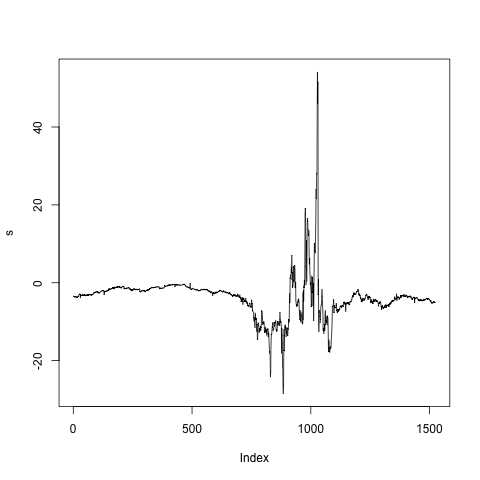

In [110]:
%%R
s<- combined_hubs$TTF - 1.1326944*combined_hubs$ZTP
plot(s, type="l")

In [74]:
%%R
adf.test(combined_hubs$TTF)


	Augmented Dickey-Fuller Test

data:  combined_hubs$TTF
Dickey-Fuller = -2.0682, Lag order = 11, p-value = 0.5495
alternative hypothesis: stationary



In [36]:
%%R
library(help="tseries")

File: /var/folders/f_/fcfn37vd6dxf0sq0ljvgz2kh0000gn/T//RtmpfT1xiq/RpackageInfo10fe9e4159da


		Information on package ‘tseries’



Description:



Package:            tseries

Version:            0.10-55

Title:              Time Series Analysis and Computational Finance

Authors@R:          c(person("Adrian", "Trapletti", role = "aut", email

                    = "adrian@trapletti.org"), person("Kurt", "Hornik",

                    role = c("aut", "cre"), email =

                    "Kurt.Hornik@R-project.org", comment = c(ORCID =

                    "0000-0003-4198-9911")), person("Blake", "LeBaron",

                    role = "ctb", comment = "BDS test code"))

Description:        Time series analysis and computational finance.

Depends:            R (>= 2.10.0)

Imports:            graphics, stats, utils, quadprog, zoo, quantmod (>=

                    0.4-9), jsonlite

License:            GPL-2

NeedsCompilation:   yes

Packaged:           2023-12-06 08:27:57 UTC; hornik

A